In [1]:
# A. Analyzing Indicators of Loan Default or Late Payments

In [3]:
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import time

# Replace with the actual file path
file_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - DSC 520 - Computational Methods\Final Project\Data.csv'

# Read the CSV file into a DataFrame
loan_data = pd.read_csv(file_path)

# Filter relevant columns for loan performance analysis
columns_for_analysis = ['loan_status', 'int_rate', 'grade', 'sub_grade', 'dti', 'annual_inc', 'verification_status', 'term', 'purpose', 'home_ownership']

# Create a new DataFrame with only the relevant columns
loan_analysis_data = loan_data[columns_for_analysis]

# Descriptive statistics for numerical columns
def calculate_numeric_stats(data):
    return data.describe()

# Frequency counts for categorical columns
def calculate_categorical_counts(column, data):
    return column, data[column].value_counts()

# Serial case
start_time_serial = time.time()
numeric_stats_serial = calculate_numeric_stats(loan_analysis_data)
categorical_counts_serial = {column: loan_analysis_data[column].value_counts() for column in loan_analysis_data.select_dtypes(include=['object']).columns}
end_time_serial = time.time()

# Parallel case
start_time_parallel = time.time()
with ThreadPoolExecutor() as executor:
    numeric_stats_future = executor.submit(calculate_numeric_stats, loan_analysis_data)
    categorical_counts_futures = [executor.submit(calculate_categorical_counts, column, loan_analysis_data) for column in loan_analysis_data.select_dtypes(include=['object']).columns]

numeric_stats_parallel = numeric_stats_future.result()
categorical_counts_parallel = {column: counts for column, counts in [future.result() for future in categorical_counts_futures]}
end_time_parallel = time.time()

# Calculate speedup and efficiency
execution_time_serial = end_time_serial - start_time_serial
execution_time_parallel = end_time_parallel - start_time_parallel

speedup = execution_time_serial / execution_time_parallel
efficiency = speedup / len(loan_analysis_data.select_dtypes(include=['object']).columns)

# Display the results
print("Descriptive Statistics for Numerical Columns (Serial):")
print(numeric_stats_serial)

print("\nFrequency Counts for Categorical Columns (Serial):")
for column, counts in categorical_counts_serial.items():
    print(f"\n{column}:\n{counts}")

print("\nDescriptive Statistics for Numerical Columns (Parallel):")
print(numeric_stats_parallel)

print("\nFrequency Counts for Categorical Columns (Parallel):")
for column, counts in categorical_counts_parallel.items():
    print(f"\n{column}:\n{counts}")

print("\nSpeedup:", speedup)
print("Efficiency:", efficiency)


C:\Users\prkav\AppData\Local\Temp\ipykernel_21604\2839930945.py:9: DtypeWarning: Columns (16,52,109,120,121,122,125,126,127,130,136,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


Descriptive Statistics for Numerical Columns (Serial):
           int_rate           dti    annual_inc
count  1.048575e+06  1.047378e+06  1.048575e+06
mean   1.280290e+01  1.928933e+01  7.967461e+04
std    4.962779e+00  1.589602e+01  8.410183e+04
min    5.310000e+00 -1.000000e+00  0.000000e+00
25%    9.160000e+00  1.193000e+01  4.700000e+04
50%    1.199000e+01  1.805000e+01  6.600000e+04
75%    1.549000e+01  2.502000e+01  9.500000e+04
max    3.099000e+01  9.990000e+02  9.930475e+06

Frequency Counts for Categorical Columns (Serial):

loan_status:
Current               603273
Fully Paid            331528
Charged Off            94286
Late (31-120 days)     12154
In Grace Period         5151
Late (16-30 days)       2162
Default                   21
Name: loan_status, dtype: int64

grade:
B    312159
C    293596
A    226847
D    144272
E     53221
F     14773
G      3707
Name: grade, dtype: int64

sub_grade:
B4    68368
C1    67619
B5    67505
B2    60243
B1    59233
C2    58995
C3    5869

C:\Users\prkav\AppData\Local\Temp\ipykernel_21604\1139326573.py:10: DtypeWarning: Columns (16,52,109,120,121,122,125,126,127,130,136,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


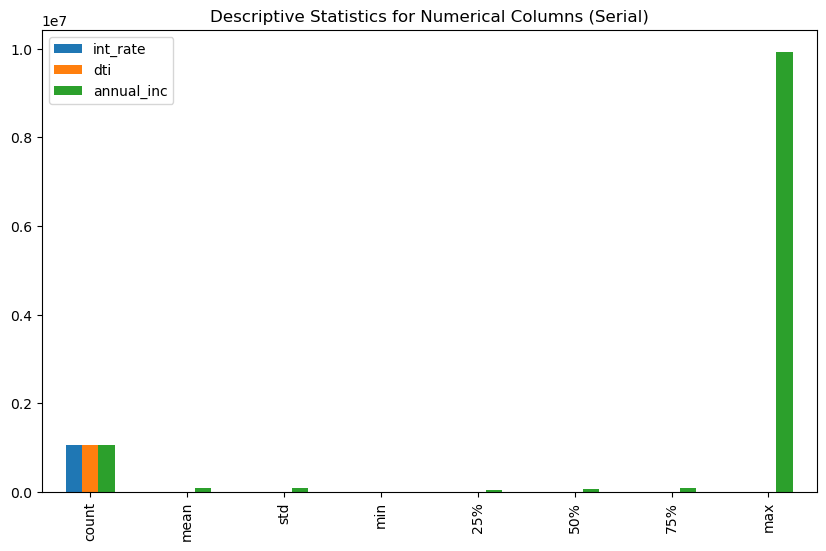

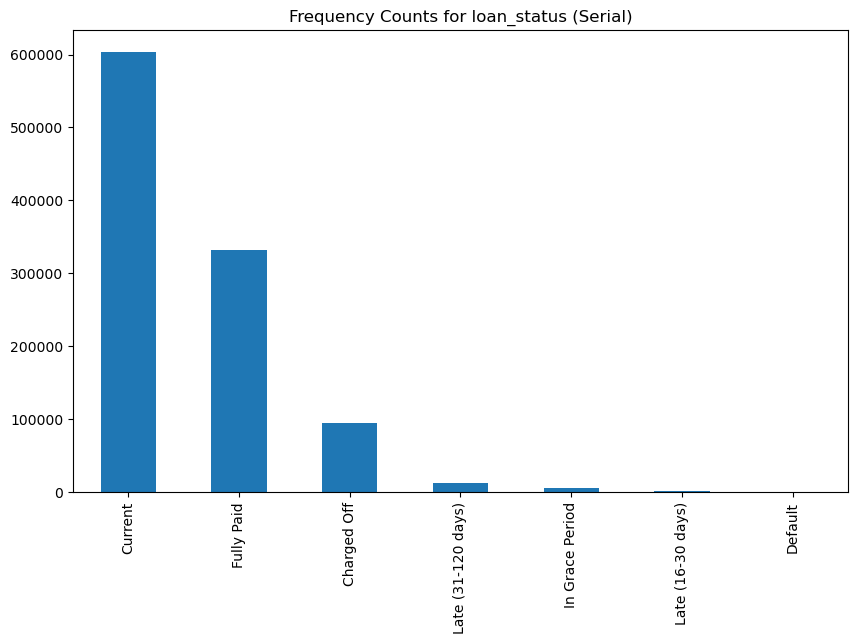

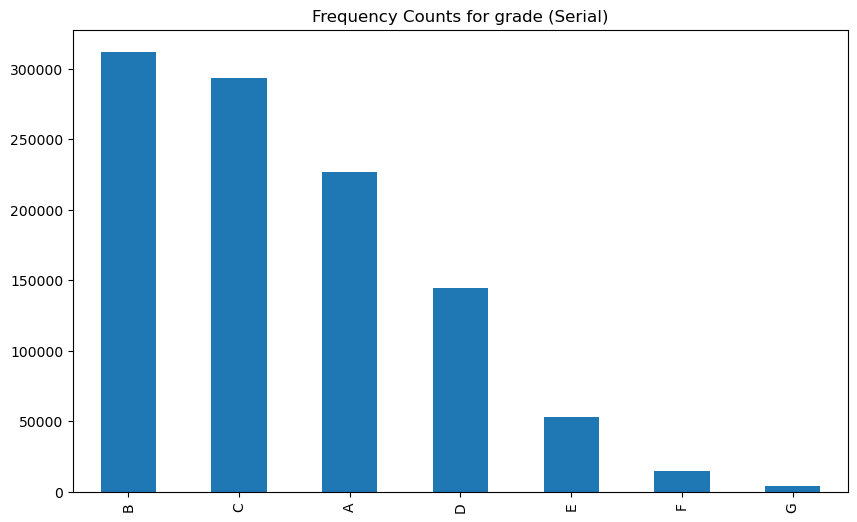

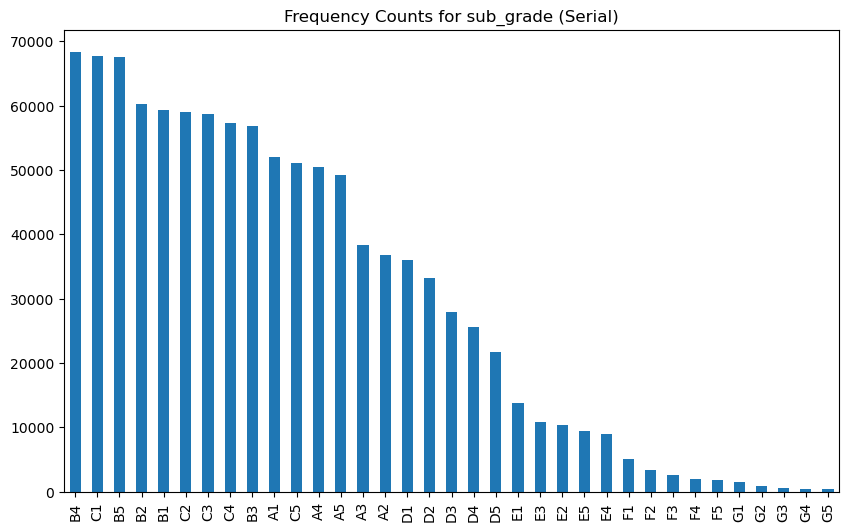

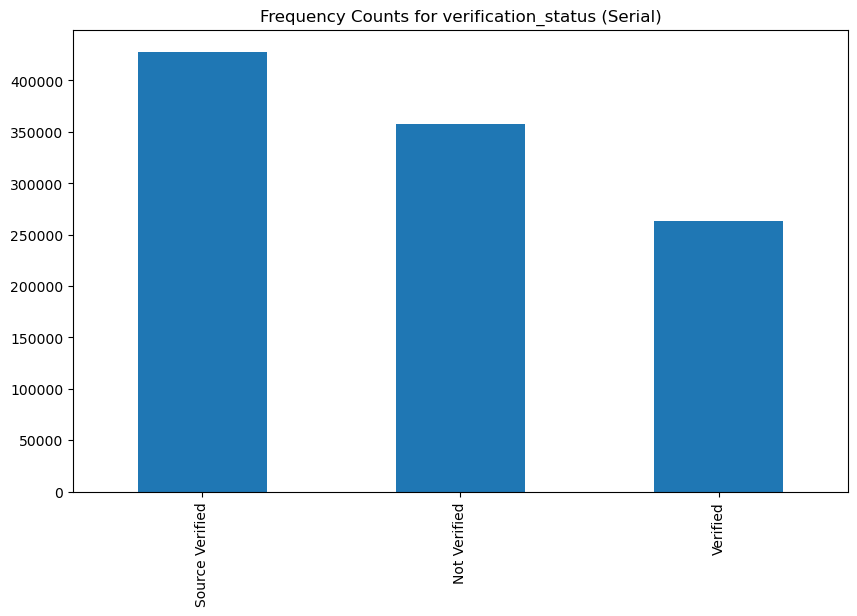

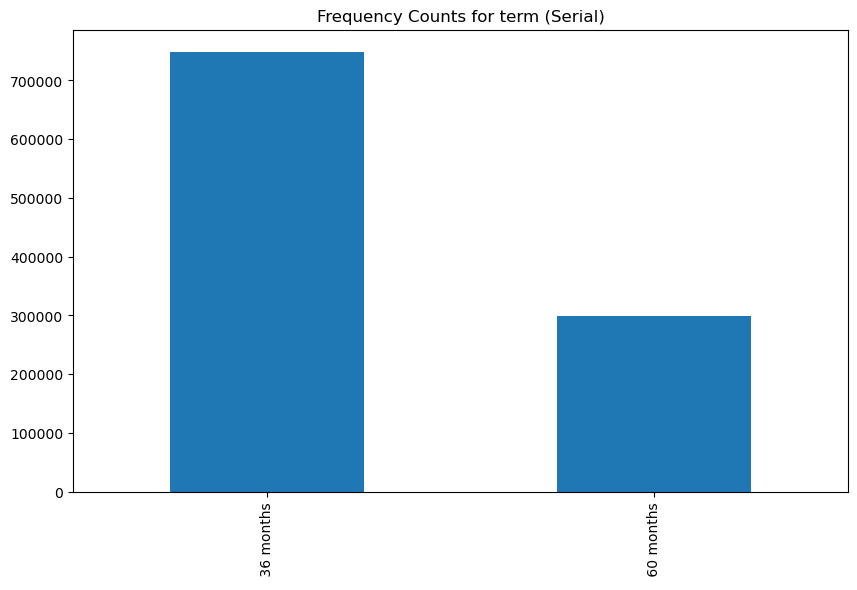

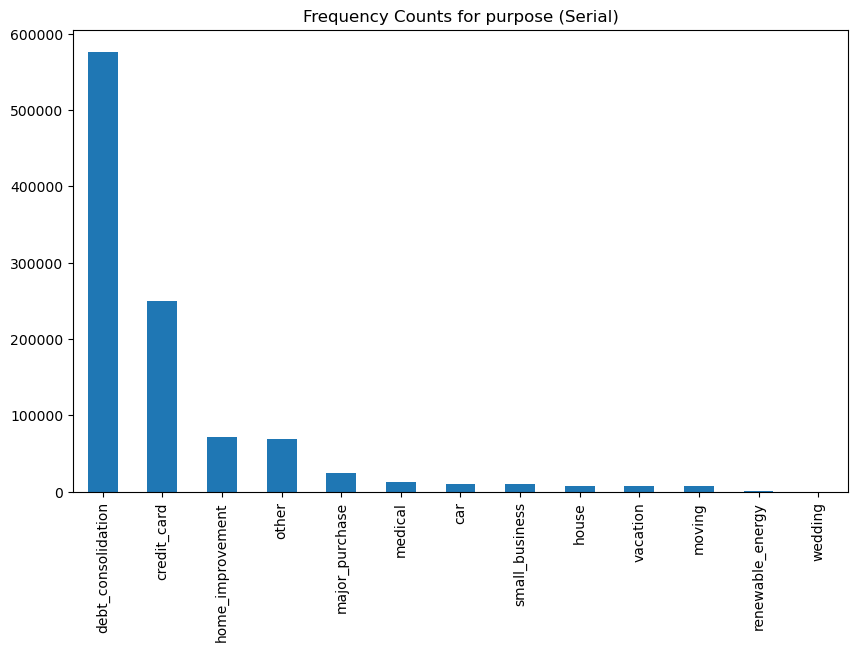

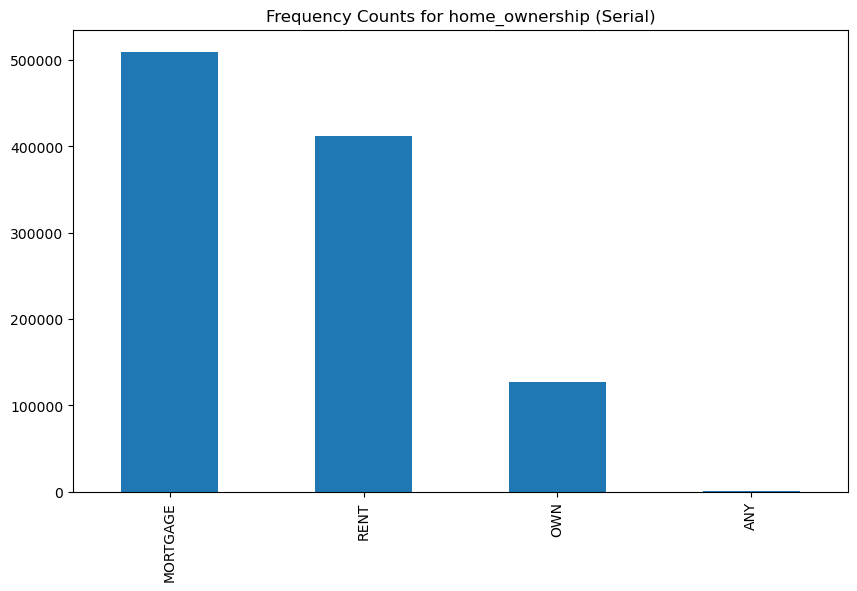

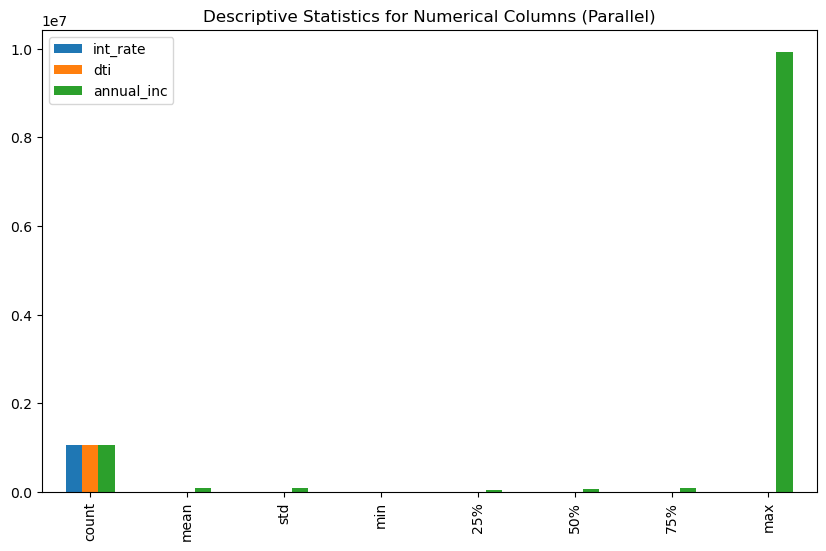

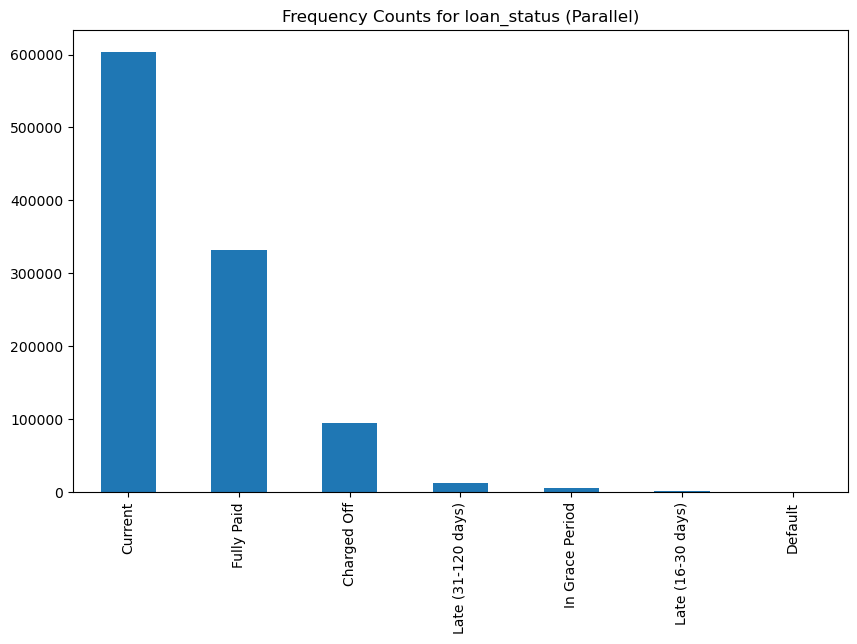

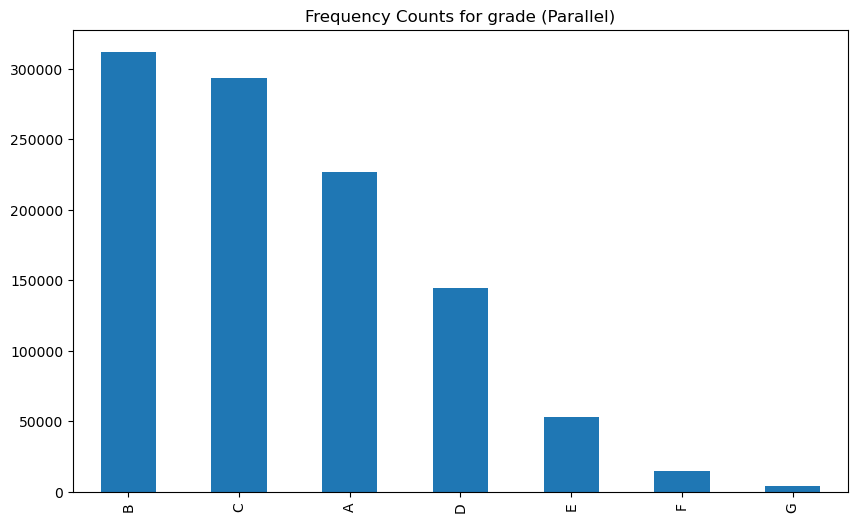

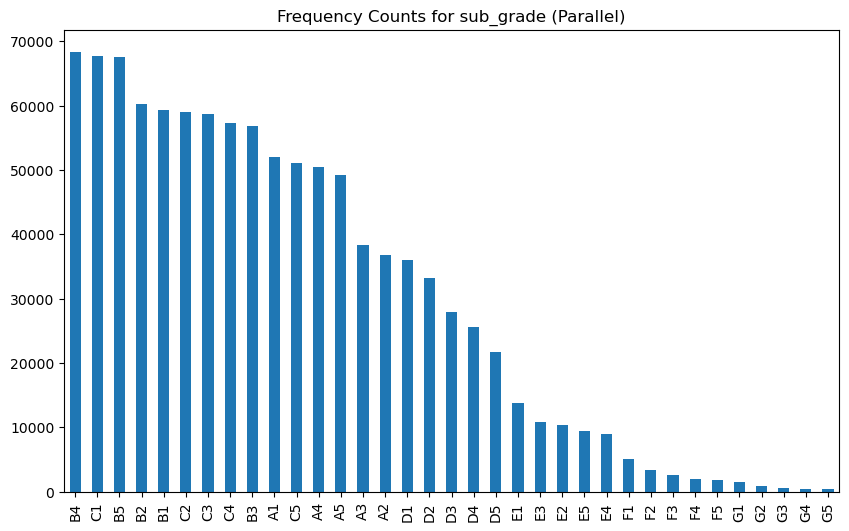

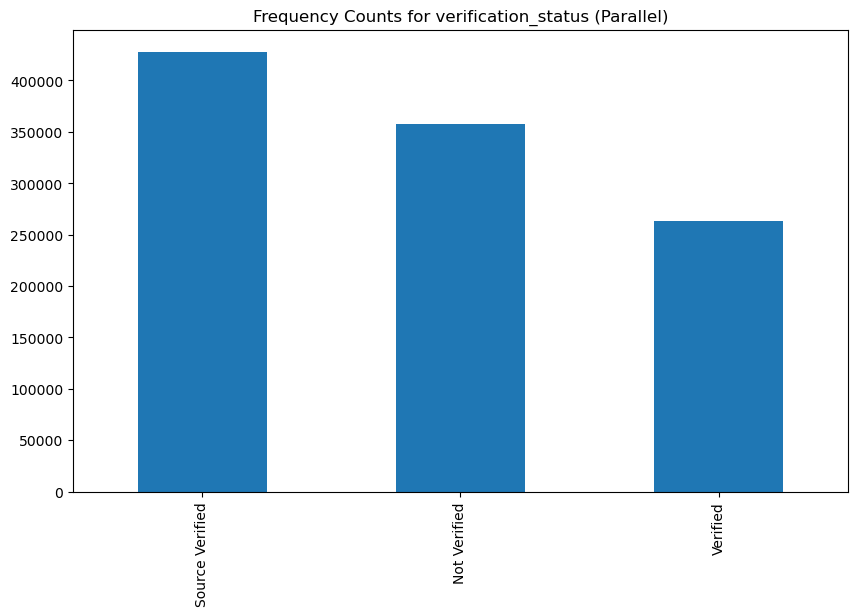

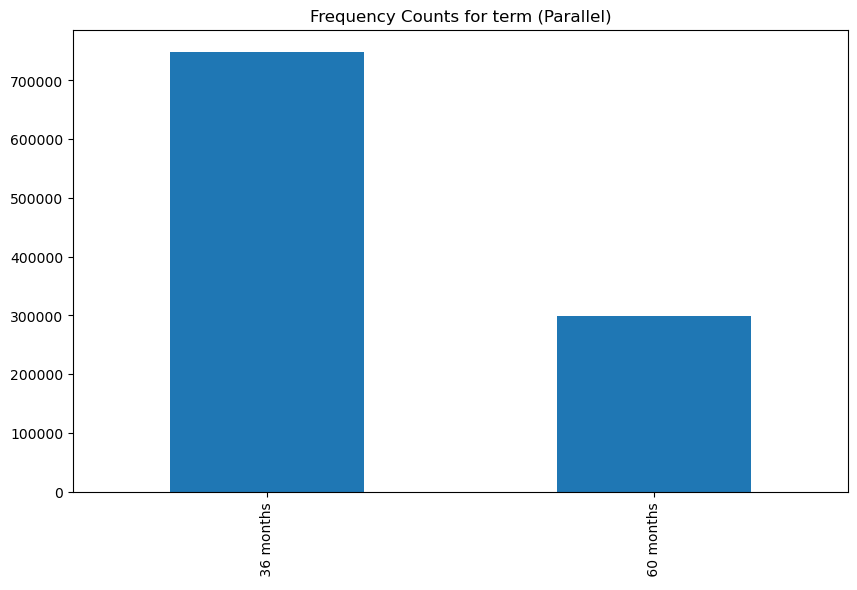

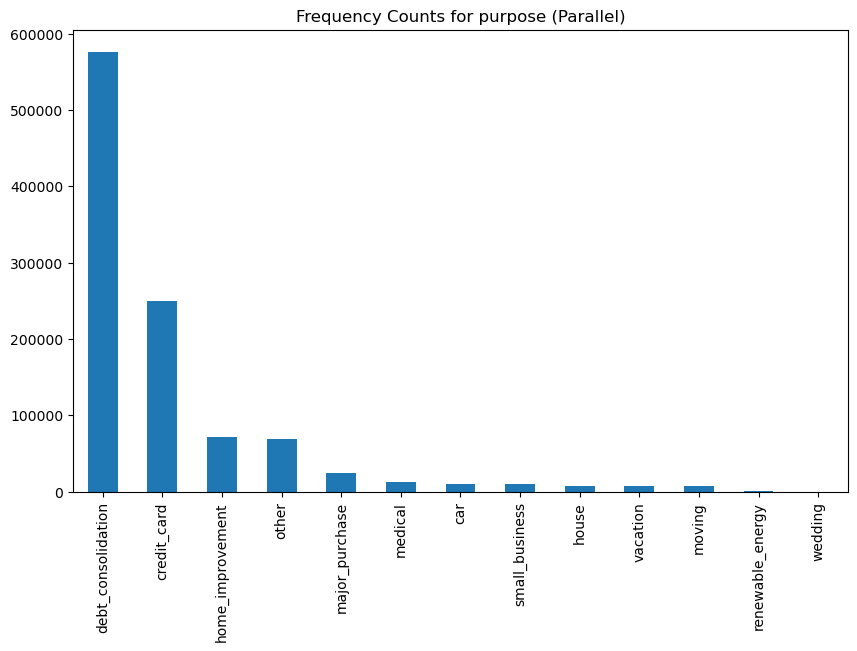

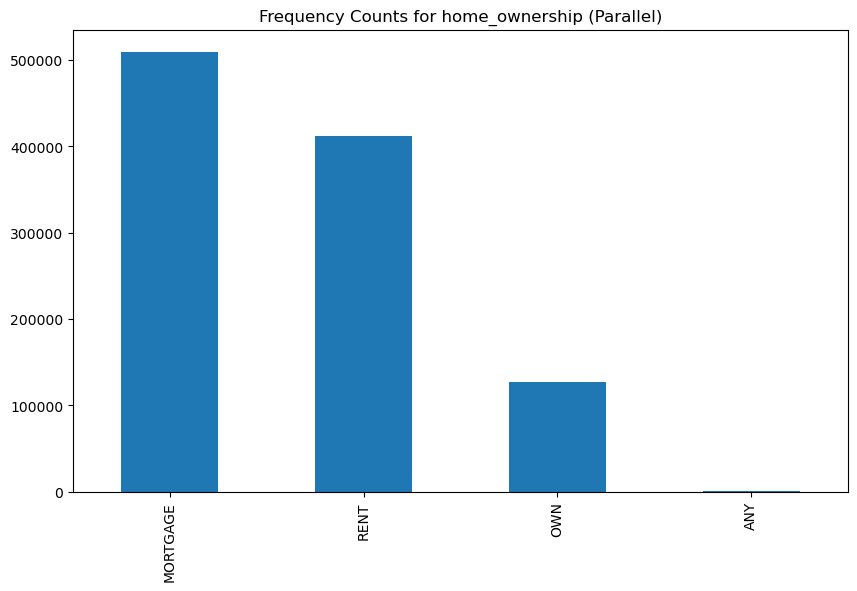

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import time

# Replace with the actual file path
file_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - DSC 520 - Computational Methods\Final Project\Data.csv'

# Read the CSV file into a DataFrame
loan_data = pd.read_csv(file_path)

# Filter relevant columns for loan performance analysis
columns_for_analysis = ['loan_status', 'int_rate', 'grade', 'sub_grade', 'dti', 'annual_inc', 'verification_status', 'term', 'purpose', 'home_ownership']

# Create a new DataFrame with only the relevant columns
loan_analysis_data = loan_data[columns_for_analysis]

# Descriptive statistics for numerical columns
def calculate_numeric_stats(data):
    return data.describe()

# Frequency counts for categorical columns
def calculate_categorical_counts(column, data):
    return column, data[column].value_counts()

# Visualize descriptive statistics
def visualize_numeric_stats(stats, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    stats.plot(kind='bar', ax=ax)
    ax.set_title(title)
    plt.show()

# Visualize categorical counts
def visualize_categorical_counts(counts, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    counts.plot(kind='bar', ax=ax)
    ax.set_title(title)
    plt.show()

# Serial case
start_time_serial = time.time()
numeric_stats_serial = calculate_numeric_stats(loan_analysis_data)
categorical_counts_serial = {column: loan_analysis_data[column].value_counts() for column in loan_analysis_data.select_dtypes(include=['object']).columns}
end_time_serial = time.time()

# Visualize serial results
visualize_numeric_stats(numeric_stats_serial, "Descriptive Statistics for Numerical Columns (Serial)")
for column, counts in categorical_counts_serial.items():
    visualize_categorical_counts(counts, f"Frequency Counts for {column} (Serial)")

# Parallel case
start_time_parallel = time.time()
with ThreadPoolExecutor() as executor:
    numeric_stats_future = executor.submit(calculate_numeric_stats, loan_analysis_data)
    categorical_counts_futures = [executor.submit(calculate_categorical_counts, column, loan_analysis_data) for column in loan_analysis_data.select_dtypes(include=['object']).columns]

numeric_stats_parallel = numeric_stats_future.result()
categorical_counts_parallel = {column: counts for column, counts in [future.result() for future in categorical_counts_futures]}
end_time_parallel = time.time()

# Visualize parallel results
visualize_numeric_stats(numeric_stats_parallel, "Descriptive Statistics for Numerical Columns (Parallel)")
for column, counts in categorical_counts_parallel.items():
    visualize_categorical_counts(counts, f"Frequency Counts for {column} (Parallel)")

# Calculate speedup and efficiency
execution_time_serial = end_time_serial - start_time_serial
execution_time_parallel = end_time_parallel - start_time_parallel

speedup = execution_time_serial / execution_time_parallel
efficiency = speedup / len(loan_analysis_data.select_dtypes(include=['object']).columns)


In [3]:
# B. Unearthing Patterns in Borrower Characteristics Associated with Elevated Risk

C:\Users\prkav\AppData\Local\Temp\ipykernel_10400\230282351.py:14: DtypeWarning: Columns (16,52,109,120,121,122,125,126,127,130,136,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)



Correlation Matrix (Serial):
                     emp_length  annual_inc       dti  home_ownership  \
emp_length             1.000000   -0.071060  0.031743        0.057312   
annual_inc            -0.071060    1.000000 -0.114007       -0.123535   
dti                    0.031743   -0.114007  1.000000       -0.036010   
home_ownership         0.057312   -0.123535 -0.036010        1.000000   
verification_status    0.025397    0.002269  0.074420        0.007226   
purpose                0.005015   -0.003227 -0.040851        0.036992   
grade                  0.006341   -0.072784  0.125458        0.076183   
sub_grade              0.006334   -0.077518  0.130947        0.082369   

                     verification_status   purpose     grade  sub_grade  
emp_length                      0.025397  0.005015  0.006341   0.006334  
annual_inc                      0.002269 -0.003227 -0.072784  -0.077518  
dti                             0.074420 -0.040851  0.125458   0.130947  
home_ownership  

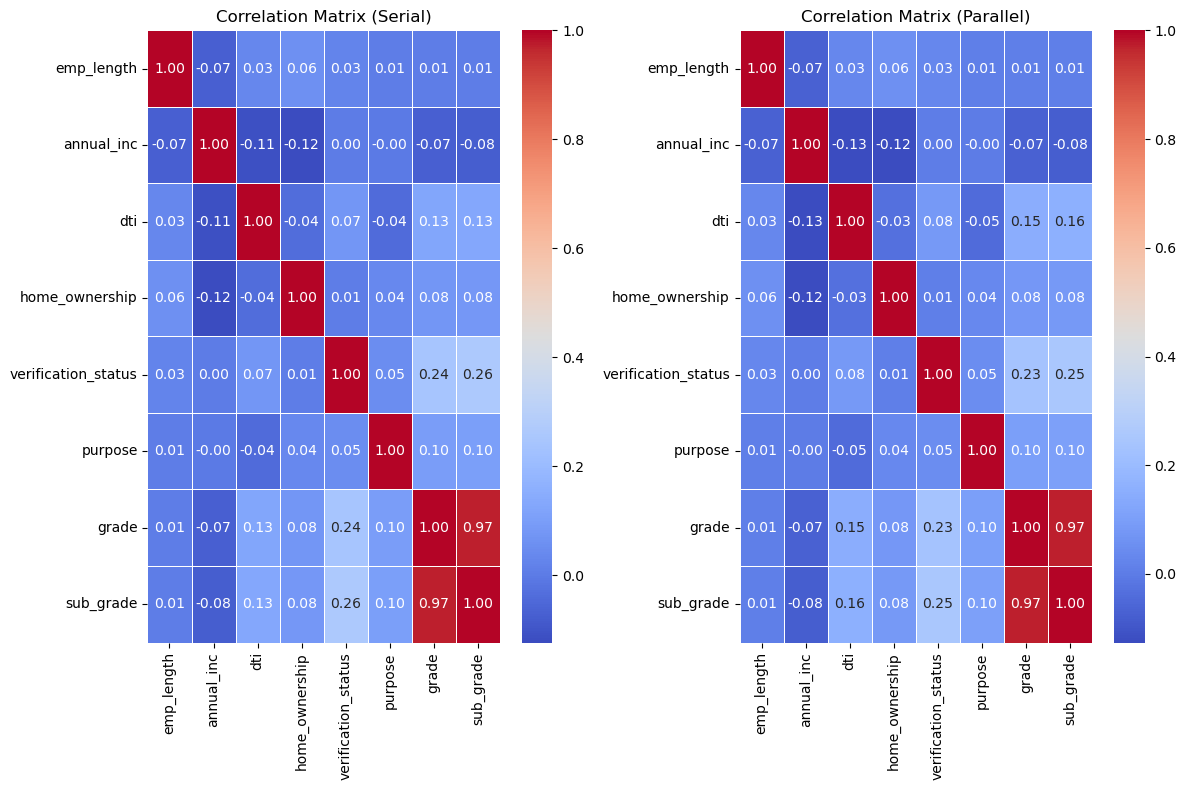

In [4]:
import pandas as pd
import numpy as np
import time
from joblib import Parallel, delayed
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with the actual file path
file_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - DSC 520 - Computational Methods\Final Project\Data.csv'

# Read the CSV file into a DataFrame
loan_data = pd.read_csv(file_path)

# Filter relevant columns for Borrower Risk Assessment
columns_for_analysis = ['emp_length', 'annual_inc', 'dti', 'home_ownership', 'verification_status', 'purpose', 'grade', 'sub_grade']

# Create a new DataFrame with only the relevant columns
risk_analysis_data = loan_data[columns_for_analysis]

# Label encode categorical columns
le = LabelEncoder()
risk_analysis_data = risk_analysis_data.apply(lambda col: le.fit_transform(col) if col.dtype == 'O' else col)

# Serial Computing
start_time_serial = time.time()

# Compute correlation matrix for numerical columns
correlation_matrix_serial = risk_analysis_data.corr()

end_time_serial = time.time()
execution_time_serial = end_time_serial - start_time_serial

# Parallel Computing
def compute_correlation_matrix_parallel(df):
    return df.corr()

start_time_parallel = time.time()

# Split the DataFrame for parallel computation
num_cores = 4  # Adjust based on your system
dfs = np.array_split(risk_analysis_data, num_cores)
results_parallel = Parallel(n_jobs=num_cores)(delayed(compute_correlation_matrix_parallel)(df) for df in dfs)

# Combine the results
correlation_matrix_parallel = sum(results_parallel) / len(results_parallel)

end_time_parallel = time.time()
execution_time_parallel = end_time_parallel - start_time_parallel

# Calculate speedup and efficiency
speedup = execution_time_serial / execution_time_parallel
efficiency = speedup / num_cores

# Display the results
print("\nCorrelation Matrix (Serial):")
print(correlation_matrix_serial)

print("\nCorrelation Matrix (Parallel):")
print(correlation_matrix_parallel)

print("\nExecution Time (Serial):", execution_time_serial, "seconds")
print("Execution Time (Parallel):", execution_time_parallel, "seconds")
print("Speedup:", speedup)
print("Efficiency:", efficiency)

# Visualize correlation matrices
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_serial, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Serial)")

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_parallel, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Parallel)")

plt.tight_layout()
plt.show()


In [5]:
# C. Revealing Geographic Disparities in Loan Performance and Borrower Characteristics

C:\Users\prkav\AppData\Local\Temp\ipykernel_21604\2572419244.py:13: DtypeWarning: Columns (16,52,109,120,121,122,125,126,127,130,136,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


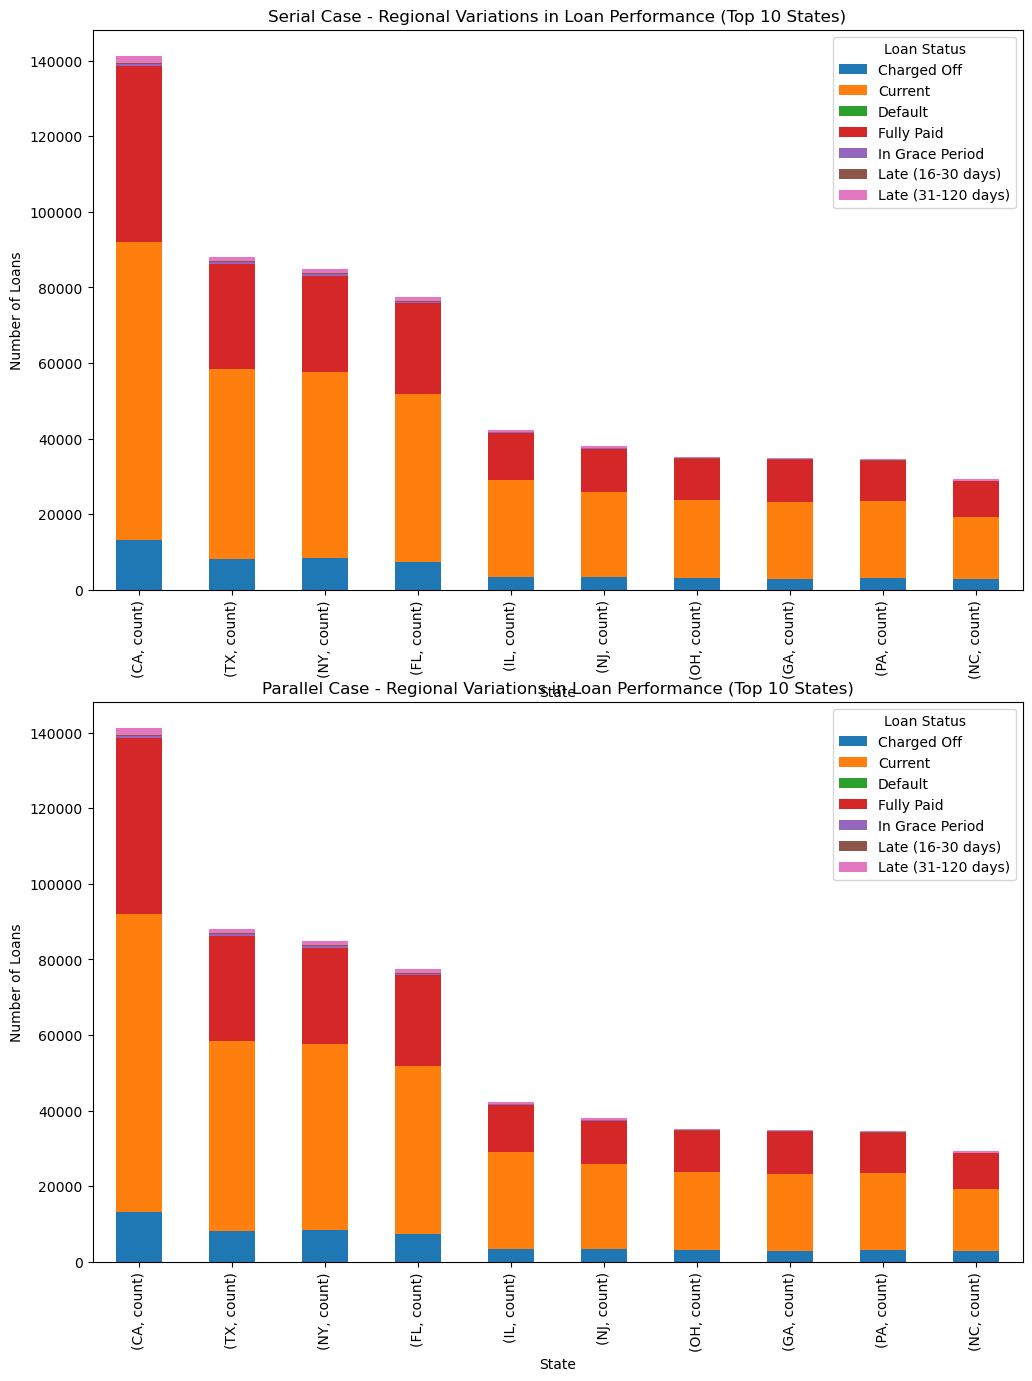

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import time

def process_state_data(state):
    state_data = df_selected[df_selected['addr_state'] == state]
    state_grouped_data = state_data.groupby(['loan_status']).size().reset_index(name='count')
    return state_grouped_data.set_index('loan_status').transpose()

# Load the dataset
file_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - DSC 520 - Computational Methods\Final Project\Data.csv'
df = pd.read_csv(file_path)

# Select relevant columns
selected_columns = ['addr_state', 'loan_status', 'annual_inc', 'dti', 'verification_status']
df_selected = df[selected_columns]

# Find the top 10 states with the highest number of loans
top_states = df_selected['addr_state'].value_counts().nlargest(10).index

# Serial case
start_time_serial = time.time()
grouped_data_serial = {}
for state in top_states:
    grouped_data_serial[state] = process_state_data(state)
end_time_serial = time.time()
time_serial = end_time_serial - start_time_serial

# Parallel case
start_time_parallel = time.time()
with ThreadPoolExecutor() as executor:
    results_parallel = list(executor.map(process_state_data, top_states))

grouped_data_parallel = {state: data for state, data in zip(top_states, results_parallel)}
end_time_parallel = time.time()
time_parallel = end_time_parallel - start_time_parallel

# Calculate speedup and efficiency
speedup = time_serial / time_parallel
efficiency = speedup / 4  # Assuming 4 threads are available

# Plotting for both cases
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Serial case
grouped_data_serial_df = pd.concat(grouped_data_serial.values(), keys=grouped_data_serial.keys())
grouped_data_serial_df.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Serial Case - Regional Variations in Loan Performance (Top 10 States)')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Loans')
ax1.legend(title='Loan Status')

# Parallel case
grouped_data_parallel_df = pd.concat(grouped_data_parallel.values(), keys=grouped_data_parallel.keys())
grouped_data_parallel_df.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Parallel Case - Regional Variations in Loan Performance (Top 10 States)')
ax2.set_xlabel('State')
ax2.set_ylabel('Number of Loans')
ax2.legend(title='Loan Status')

plt.show()




In [9]:
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import time

def process_state_data(state):
    state_data = df_selected[df_selected['addr_state'] == state]
    state_grouped_data = state_data.groupby(['loan_status']).size().reset_index(name='count')
    state_grouped_data['percentage'] = (state_grouped_data['count'] / state_grouped_data['count'].sum()) * 100
    sorted_data = state_grouped_data.sort_values(by='percentage', ascending=False)
    print(f"\n{state} - Loan Status Percentages:")
    print(sorted_data[['loan_status', 'percentage']])
    return sorted_data

# Load the dataset
file_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - DSC 520 - Computational Methods\Final Project\Data.csv'
df = pd.read_csv(file_path)

# Select relevant columns
selected_columns = ['addr_state', 'loan_status', 'annual_inc', 'dti', 'verification_status']
df_selected = df[selected_columns]

# Find the top 10 states with the highest number of loans
top_states = df_selected['addr_state'].value_counts().nlargest(10).index

# Serial case
start_time_serial = time.time()
grouped_data_serial = {}
for state in top_states:
    grouped_data_serial[state] = process_state_data(state)
end_time_serial = time.time()
time_serial = end_time_serial - start_time_serial

# Parallel case
start_time_parallel = time.time()
with ThreadPoolExecutor() as executor:
    results_parallel = list(executor.map(process_state_data, top_states))

grouped_data_parallel = {state: data for state, data in zip(top_states, results_parallel)}
end_time_parallel = time.time()
time_parallel = end_time_parallel - start_time_parallel

# Calculate speedup and efficiency
speedup = time_serial / time_parallel
efficiency = speedup / 4  # Assuming 4 threads are available

# Print speedup and efficiency
print(f"\nSerial Time: {time_serial} seconds")
print(f"Parallel Time: {time_parallel} seconds")
print(f"Speedup: {speedup:.2f}")
print(f"Efficiency: {efficiency:.2%}")


C:\Users\prkav\AppData\Local\Temp\ipykernel_10400\570989365.py:16: DtypeWarning: Columns (16,52,109,120,121,122,125,126,127,130,136,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



CA - Loan Status Percentages:
          loan_status  percentage
1             Current   55.799899
3          Fully Paid   33.018300
0         Charged Off    9.351820
6  Late (31-120 days)    1.181021
4     In Grace Period    0.428625
5   Late (16-30 days)    0.218209
2             Default    0.002125

TX - Loan Status Percentages:
          loan_status  percentage
1             Current   57.013297
3          Fully Paid   31.836572
0         Charged Off    9.239686
6  Late (31-120 days)    1.206955
4     In Grace Period    0.497784
5   Late (16-30 days)    0.202296
2             Default    0.003409

NY - Loan Status Percentages:
          loan_status  percentage
1             Current   58.202835
3          Fully Paid   29.847880
0         Charged Off    9.750551
6  Late (31-120 days)    1.384519
4     In Grace Period    0.569126
5   Late (16-30 days)    0.242733
2             Default    0.002357

FL - Loan Status Percentages:
          loan_status  percentage
1             Current   57